In [2]:
import pandas as pd
import sqlite3
# import seaborn as sns

In [46]:
# last_date = 0

In [143]:
with sqlite3.connect('db.db') as db:
    cursor = db.cursor()
    # query = """SELECT date FROM news WHERE maxvalue (date) """
    query = """SELECT max (date), agency, title FROM news """
    cursor.execute(query)

    for res in cursor:
        last_date = res[0]

In [144]:
last_date

'2022-07-02 17:10:29'

In [3]:
df = pd.read_pickle('table_news.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'table_news.pkl'

In [5]:
df.shape[0]

637

In [146]:
fresh_df = df[df.date > last_date]

In [147]:
fresh_df

,date,title,short_news,first_link,raw_news,category,agency
18026,2022-07-02 22:10:15,В Калифорнии вручили медаль Ладыженской за вкл...,В Калифорнии вручили медаль Ладыженской за вкл...,https://nplus1.ru/news/2022/07/02/1OAL,Весной 2022 года исполнилось сто лет со дня ро...,science,nplusone
63609,2022-07-02 21:26:26,Восьмидесятилетняя Татьяна Кожевникова выгляды...,Последствия обстрелов боеприпасами в Донецкой ...,NaN,"Славянск, Донецкая область. Последствия обстре...",society,meduzalive
63608,2022-07-02 21:14:17,"В Одессе, где объявили воздушную тревогу, прои...","В Одессе, где только что объявили воздушную тр...",NaN,"Пишут о взрывах в Одессе, где только что объяв...",society,meduzalive
63607,2022-07-02 20:55:39,В Одесской области на взрывном устройстве подо...,На пляже в Одесской области на неустановленном...,https://t.me/odesacityofficial/9145,На пляже в Одесской области подорвались двое м...,society,meduzalive
35285,2022-07-02 20:30:39,«Росбанк» сообщил о блокировке корсчёта Clears...,"В «Росбанке» сообщили, что решение Clearstream...",vc.ru/finance/454769,Завершаем трансляцию: — В «Росбанке» сообщили...,society,vcnews
63606,2022-07-02 20:29:08,"В Белом доме заявили, что Байден направил отче...","В Белом доме заявили, что Джо Байден направил ...",https://t.me/kommersant/34959,Джо Байден направил в Конгресс отчеты о присое...,society,meduzalive
13012,2022-07-02 20:02:23,«Морской монстр» от Netflix выйдет в российски...,Российская студия озвучивания Red Head Sound н...,rozetked.me/news/24306,"Студия озвучивания Red Head Sound сообщила, чт...",entertainment,rozetked
63605,2022-07-02 19:58:01,Саша Зубковский отпущен из центра «Э» после тщ...,В Екатеринбурге журналист Саша Зубковский отпу...,https://t.me/sotaproject/42776?single,Журналист It's My City Саша Зубковский отпущен...,society,meduzalive
6472,2022-07-02 19:50:52,Попытка отменить автономию узбекского Каракалп...,ДАННОе СООБЩЕНИЕ (МАТЕРИАЛ) СОЗДАНо И (ИЛИ) РА...,https://meduza.io/feature/2022/07/02/popytka-o...,ДАННОЕ СООБЩЕНИЕ (МАТЕРИАЛ) СОЗДАНО И (ИЛИ) РА...,society,meduzapro
63604,2022-07-02 19:45:59,В Каракалпакстане прошли массовые беспорядки,В автономной республике Каракалпакстан прошли ...,https://mdza.io/W_T-N4Accfo,Подробнее о протестах в автономной республике ...,society,meduzalive


In [148]:
fresh_df.to_sql(name='news', con=db, if_exists='append', index=True)

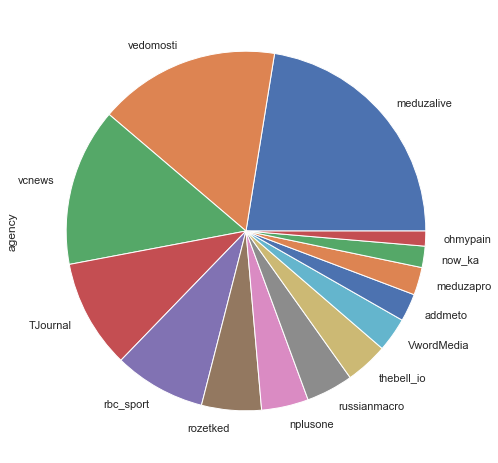

In [149]:
agency = df.agency.value_counts().plot(kind='pie')

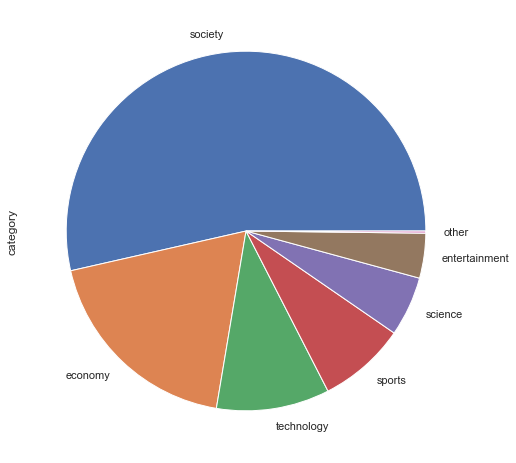

In [150]:
category = df.category.value_counts().plot(kind='pie')